In [1]:
import os
print(os.getcwd())
os.chdir('c:/Users/Usuario/REPO_BOOTCAMP/EDA_entrega/src')

print(os.getcwd())
# Importamos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils.funciones_eda import *

c:\Users\Usuario\REPO_BOOTCAMP\EDA_entrega
c:\Users\Usuario\REPO_BOOTCAMP\EDA_entrega\src


## Lo tenemos todo en orden para empezar a pintar graficas y sacar conclusiones.
    - No divagaremos e iremos directamente a por nuestros objetivos/hipótesis

## **· EL Q4 FUE EL TRIMESTRE CON MAS VENTAS.**


In [2]:
df_analisis = pd.read_csv("./data/online_retail_limpiado.csv")

In [3]:
df_filtro_ventas_true = df_analisis[df_analisis.Ventas == True]

ventas_trimestre_suma = df_filtro_ventas_true.groupby("Trimestres")["Precio_Total"].sum()

print(ventas_trimestre_suma)

Trimestres
1    1475439.82
2    1640238.06
3    1703022.62
4    2295187.36
Name: Precio_Total, dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_26756\320400646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


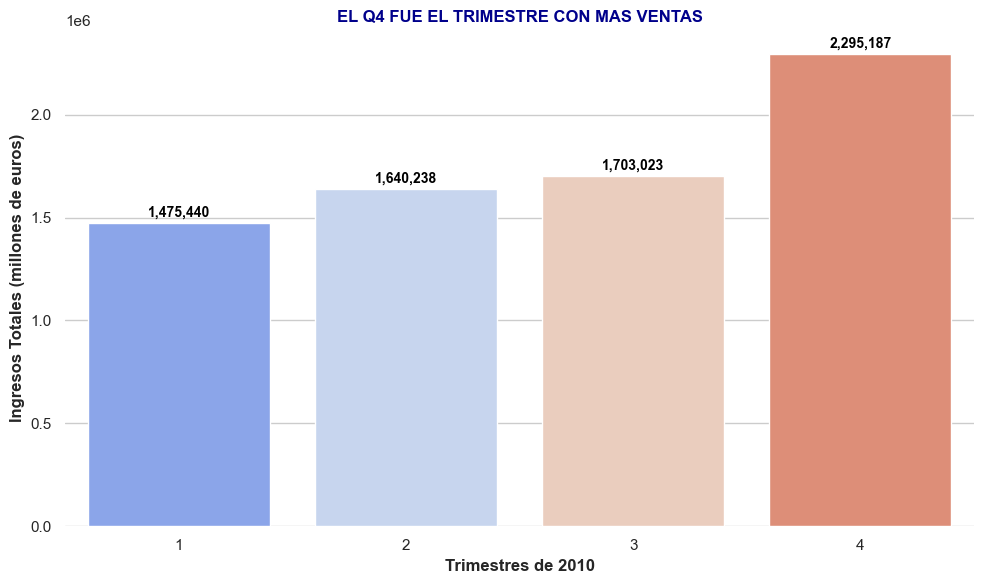

In [4]:
sns.set(style="whitegrid")
colores = sns.color_palette("coolwarm", len(ventas_trimestre_suma))

plt.figure(figsize=(10, 6))
barras = sns.barplot(
    x=ventas_trimestre_suma.index, 
    y=ventas_trimestre_suma.values, 
    palette=colores
)
for index, value in enumerate(ventas_trimestre_suma.values):
    plt.text(x=index, y=value + 50000, s=f"{value:,.0f}",
             color='black', ha='center', va='center', fontsize=10, fontweight='bold')
plt.xlabel("Trimestres de 2010", fontsize = 12, fontweight="bold")
plt.ylabel("Ingresos Totales (millones de euros)", fontsize=12, fontweight="bold")
plt.title("EL Q4 FUE EL TRIMESTRE CON MAS VENTAS", fontweight = "bold", color = "darkblue")
sns.despine(left=True, bottom=True)
plt.savefig("img/q4trimestreconmasventas.png", dpi=300)
plt.tight_layout()


## **- Reino Unido es el país que más compra en nuestra tienda online**

In [5]:
ventas_paises = df_filtro_ventas_true.groupby("Country")["Precio_Total"].sum()

In [6]:
top_5_paises = ventas_paises.sort_values(ascending=False).head(5)

In [7]:
top_5_paises.values

array([6248038.69,  223331.68,  174266.91,  115054.53,   62271.91])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_26756\3633787076.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_5_paises.values, y = top_5_paises.index, palette= colores_top_5_paises)


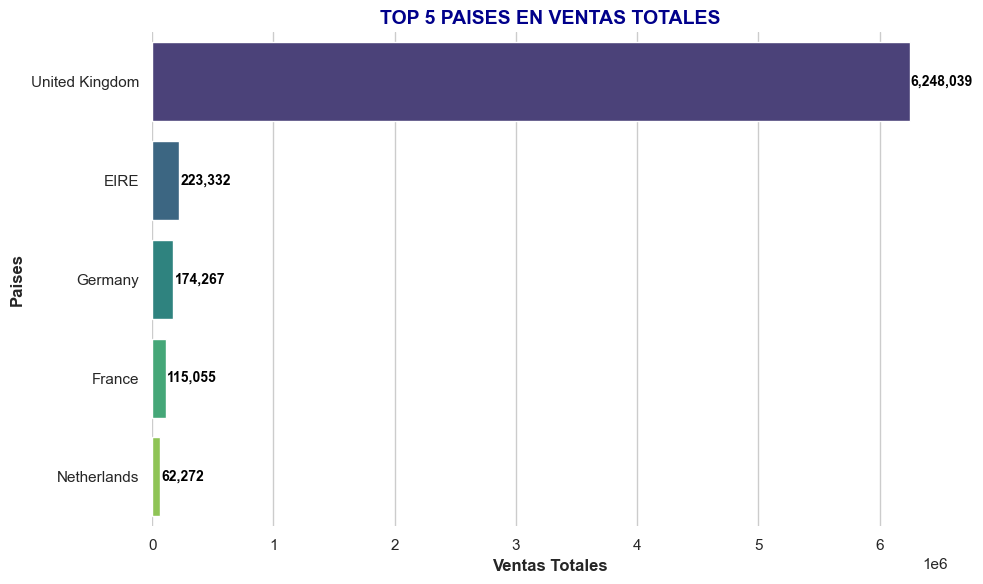

In [8]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 6))
colores_top_5_paises = sns.color_palette("viridis", len(top_5_paises))

sns.barplot(x = top_5_paises.values, y = top_5_paises.index, palette= colores_top_5_paises)

for index, value in enumerate(top_5_paises.values):
    plt.text(x=value + 10000, y= index, s=f"{value:,.0f}",
             color='black', va='center', fontsize=10, fontweight='bold')
    
plt.xlabel("Ventas Totales", fontsize = 12, fontweight="bold")
plt.ylabel("Paises", fontsize=12, fontweight="bold")
plt.title("TOP 5 PAISES EN VENTAS TOTALES", fontsize = 14, fontweight = "bold", color = "darkblue")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("img/top5paisesenvetnastotales.png", dpi=300)
plt.show()


## **- Las devoluciones son un 5% frente a las ventas.**

In [9]:
total_ventas = len(df_analisis[df_analisis["Ventas"] == True])
total_devoluciones = len(df_analisis[df_analisis["Devolucion"] == True])

In [10]:
ventas_porcentaje = (total_ventas / len(df_analisis)) * 100
devoluciones_porcentaje = (total_devoluciones / len(df_analisis)) * 100

In [11]:
data_porcentaje = pd.DataFrame({
    "Categoria" : ["Ventas", "Devolucion"],
    "Porcentaje" : [ventas_porcentaje, devoluciones_porcentaje]
})

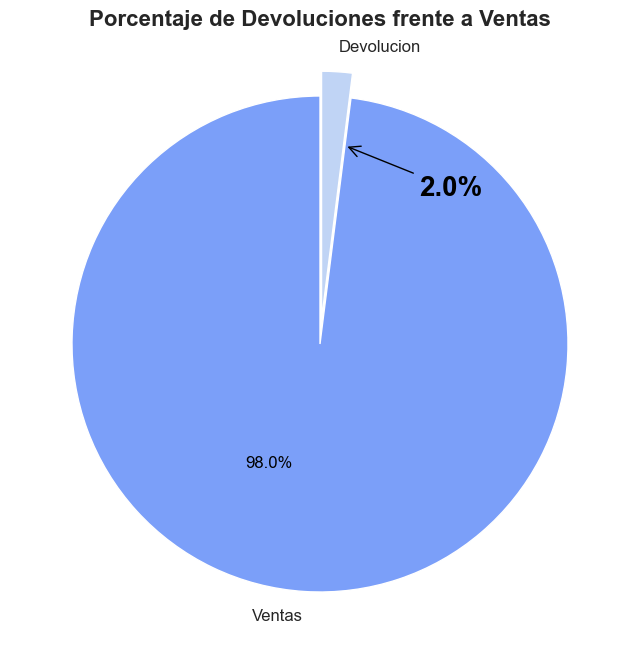

In [12]:
plt.figure(figsize=(8, 9))
plt.pie(data_porcentaje["Porcentaje"], labels=data_porcentaje["Categoria"], 
        startangle=90, colors=colores, explode=[0, 0.1], shadow=False, textprops={"fontweight" : "light", "fontsize":12}, pctdistance=0.8,)
plt.annotate(   
    "2.0%",
    xy=(0.1, 0.8),
    xytext=(0.4, 0.6),
    fontsize=20, fontweight="bold", color="black",
    arrowprops=dict(arrowstyle="->", lw=1, color="black")
)
plt.annotate(   
    "98.0%",
    xy=(0.0, 0.0),
    xytext=(-0.3, -0.5),
    fontsize=12, color="black"
)
plt.title("Porcentaje de Devoluciones frente a Ventas", fontsize=16, fontweight='bold')
plt.savefig("img/devolucionesfrenteventas.png", dpi=300)


# **Saber mas**

## - Cual es el producto mas vendido y su proyeccion durante el año

In [13]:
# df_q1 = pd.read_csv("./data/online_retail_Q1.csv")
# df_q2 = pd.read_csv("./data/online_retail_Q2.csv")
# df_q3 = pd.read_csv("./data/online_retail_Q3.csv")
# df_q4 = pd.read_csv("./data/online_retail_Q4.csv")

In [14]:
# Cuando hablamos de mas vendido, hablamos de mas cantidad
ventas_true = df_analisis[df_analisis["Ventas"] == True]

producto_mas_vendido = ventas_true.groupby("StockCode")["Quantity"].sum()
stockcode_max = producto_mas_vendido.idxmax()
cantidad_max = producto_mas_vendido.max()
print(F"El Stockcode mas vendido es {stockcode_max} con un total de {cantidad_max} unidades")

El Stockcode mas vendido es 85123A con un total de 30446 unidades


In [15]:
stockcode_objetivo = "85123A"

df_stockcode = df_analisis[df_analisis.StockCode == stockcode_objetivo]

evolucion_stockcode = df_stockcode.groupby("Trimestres")["Quantity"].sum().reset_index()
evolucion_stockcode

,Trimestres,Quantity
0,1,8184
1,2,7388
2,3,7800
3,4,7356


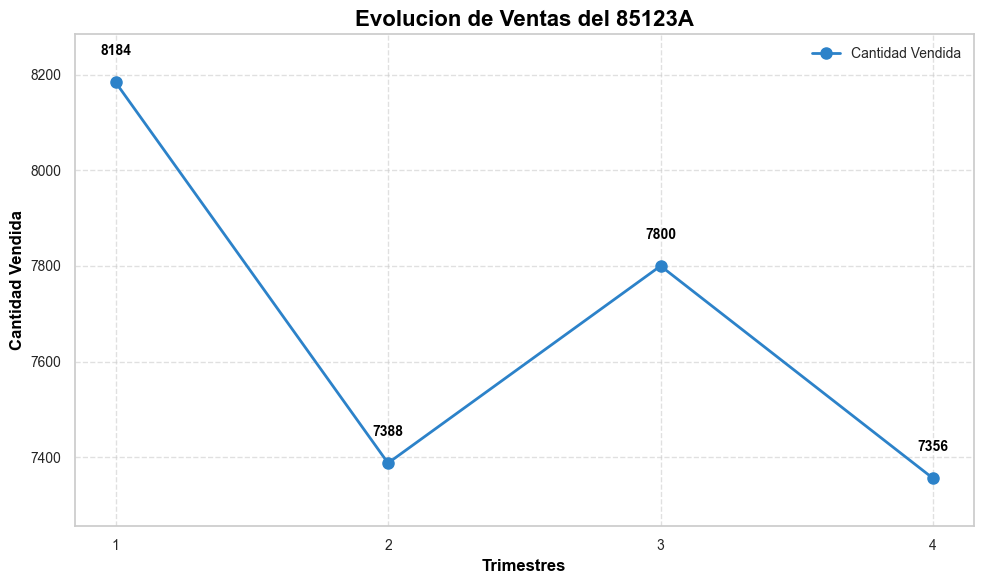

In [16]:
plt.figure(figsize=(10,6))
plt.plot(evolucion_stockcode["Trimestres"], evolucion_stockcode["Quantity"],
         marker = "o", linestyle = "-", color = "#2C82C9", linewidth = 2, markersize = 8, label = "Cantidad Vendida")


y_min, y_max = evolucion_stockcode["Quantity"].min(), evolucion_stockcode["Quantity"].max()
plt.ylim(y_min - 100, y_max + 100)

for i, value in enumerate(evolucion_stockcode["Quantity"]):
    plt.text(evolucion_stockcode["Trimestres"][i], value + 50, f"{value}",
             ha = "center", va = "bottom", fontsize = 10, fontweight = "bold", color = "black")
    
plt.title("Evolucion de Ventas del 85123A", fontsize = 16, fontweight = "bold", color = "black")
plt.xlabel("Trimestres", fontsize = 12, fontweight = "bold", color = "black")
plt.ylabel("Cantidad Vendida", fontsize = 12, fontweight = "bold", color = "black")

plt.grid(visible=True, linestyle="--", alpha=0.6)

plt.xticks(evolucion_stockcode["Trimestres"], fontsize=10, fontweight="light")
plt.yticks(fontsize=10)

plt.legend(loc="upper right", fontsize = 10, frameon = False)
plt.tight_layout()
plt.savefig("img/evoluciondeventasdel85123A.png", dpi=300)
plt.show()

In [17]:
# Vemos que descripcion tiene este codigo:

df_analisis[df_analisis["StockCode"] == "85123A"].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Devolucion,Ventas,Precio_Total,Trimestres
59,C493430,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-01-04 11:43:00,3.04,14680.0,United Kingdom,True,False,3.04,1
86,493432,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-01-04 12:30:00,3.04,14680.0,United Kingdom,False,True,97.21,1
395,C493445,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2010-01-04 14:00:00,3.04,16296.0,United Kingdom,True,False,6.08,1


## - Producto mas devuelto y visto por Trimestres

In [18]:
devoluciones_true = df_analisis[df_analisis["Devolucion"] == True]
producto_mas_devuelto = devoluciones_true.groupby("StockCode")["Quantity"].sum()

stockcode_devoluciones_max = producto_mas_devuelto.idxmax()
cantidad_devoluciones_max = producto_mas_devuelto.max()
print(f"El StockCode mas devuelto es {stockcode_devoluciones_max} con un total de {cantidad_devoluciones_max} unidades")

El StockCode mas devuelto es 79323W con un total de 752 unidades


In [19]:
stockcode_objetivo_devoluciones = "79323W"

df_stockcode_devoluciones = df_analisis[df_analisis.StockCode == stockcode_objetivo_devoluciones]

evolucion_stockcode_devoluciones = df_stockcode_devoluciones.groupby("Trimestres")["Quantity"].sum().reset_index()
evolucion_stockcode_devoluciones

,Trimestres,Quantity
0,1,700
1,2,820
2,3,30
3,4,4


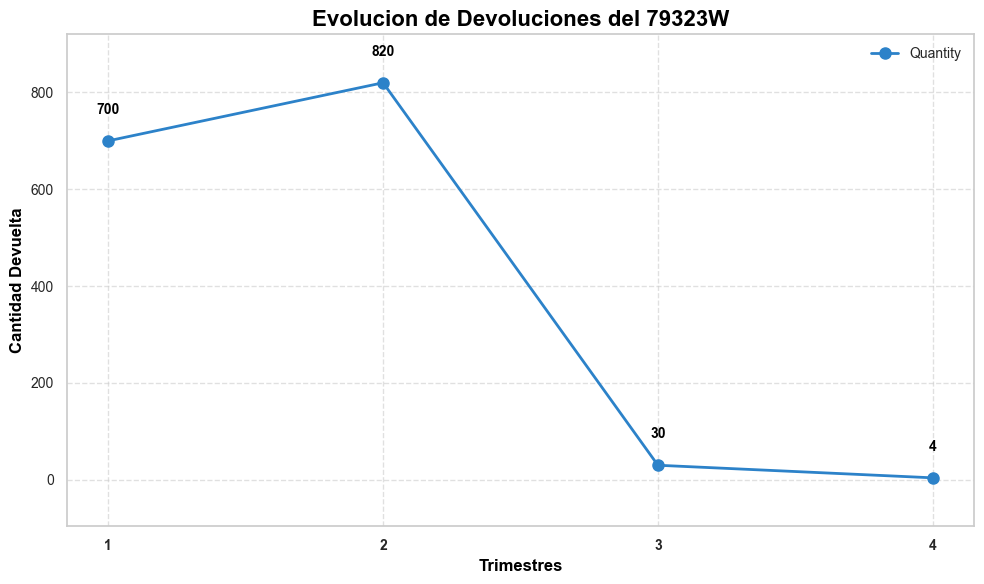

<Figure size 640x480 with 0 Axes>

In [20]:
graficar_evolucion(evolucion_stockcode_devoluciones, x_col="Trimestres", y_col="Quantity", titulo="Evolucion de Devoluciones del 79323W",xlabel="Trimestres", ylabel="Cantidad Devuelta")
plt.savefig("img/evoluciondedevoluciones79323W.png", dpi=300)


In [21]:
# Vemos que descripcion tiene este codigo:

df_analisis[df_analisis["StockCode"]== "79323W"].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Devolucion,Ventas,Precio_Total,Trimestres
315,493443,79323W,WHITE CHERRY LIGHTS,1,2010-01-04 13:39:00,6.82,14527.0,United Kingdom,False,True,6.82,1
1606,493721,79323W,WHITE CHERRY LIGHTS,1,2010-01-06 10:53:00,6.82,17362.0,United Kingdom,False,True,6.82,1
1816,493800,79323W,WHITE CHERRY LIGHTS,12,2010-01-07 11:16:00,6.82,18094.0,United Kingdom,False,True,81.86,1


## - Precio medio de compra por Factura/Ticket

In [22]:
ticket_medio_por_invoice = ventas_true.groupby('Invoice')['Precio_Total'].mean().reset_index()
ticket_medio_por_invoice


,Invoice,Precio_Total
0,493410,19.500000
1,493412,19.500000
2,493413,1.966667
3,493414,62.793333
4,493427,16.750556
...,...,...
18738,538167,14.043200
18739,538168,12.311333
18740,538169,8.006154
18741,538170,14.900800


In [23]:
ticket_medio_por_invoice = ticket_medio_por_invoice.rename(columns={"Precio_Total": "Ticket_Medio"})

In [24]:
ticket_medio_global = ventas_true.Precio_Total.mean()

In [25]:
round(ticket_medio_global,2)

np.float64(15.62)

## - El pais que mas devuelve

In [26]:
pais_devoluciones = devoluciones_true.groupby("Country")["Quantity"].sum()
top_5_paises_devoluciones = pais_devoluciones.sort_values(ascending=False).head(5)

pais_devoluciones_max = pais_devoluciones.idxmax()
cantidad_paises_devoluciones = pais_devoluciones.max()
print(f"El pais que mas devuelve es {pais_devoluciones_max} con un total de {cantidad_paises_devoluciones}")

El pais que mas devuelve es United Kingdom con un total de 58295


C:\Users\Usuario\AppData\Local\Temp\ipykernel_26756\1794623620.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_5_paises_devoluciones.values, y = top_5_paises_devoluciones.index, palette= colores_top_5_paises)


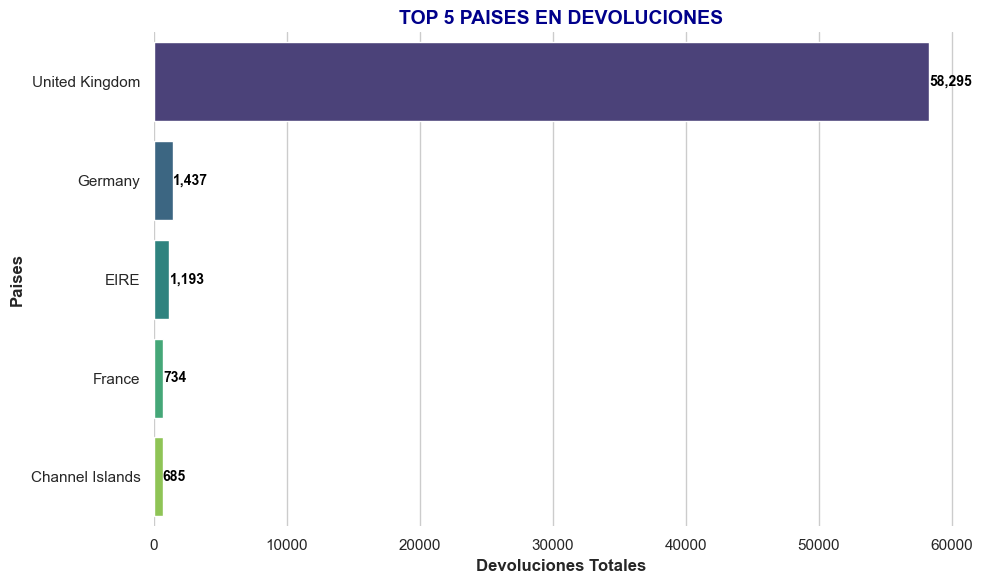

In [27]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 6))
colores_top_5_paises_dev = sns.color_palette("viridis", len(top_5_paises_devoluciones))

sns.barplot(x = top_5_paises_devoluciones.values, y = top_5_paises_devoluciones.index, palette= colores_top_5_paises)

for index, value in enumerate(top_5_paises_devoluciones.values):
    plt.text(x=value + 10, y= index, s=f"{value:,.0f}",
             color='black', va='center', fontsize=10, fontweight='bold')
    
plt.xlabel("Devoluciones Totales", fontsize = 12, fontweight="bold")
plt.ylabel("Paises", fontsize=12, fontweight="bold")
plt.title("TOP 5 PAISES EN DEVOLUCIONES", fontsize = 14, fontweight = "bold", color = "darkblue")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("img/top5paisesendevoluciones.png", dpi=300)
plt.show()


In [28]:
ventas_cantidad_paises = ventas_true.groupby("Country")["Quantity"].sum()
ventas_cantidad_paises = ventas_cantidad_paises.rename("Total_Ventas")

pais_devoluciones_2 = pais_devoluciones
pais_devoluciones_2 = pais_devoluciones_2.rename("Total_Devoluciones")

proporcion_ventas_devoluciones = pd.concat([ventas_cantidad_paises, pais_devoluciones_2], axis = 1).fillna(0)
proporcion_ventas_devoluciones

proporcion_ventas_devoluciones["Porcentaje_Ventas_Devoluciones"] = proporcion_ventas_devoluciones["Total_Devoluciones"] / proporcion_ventas_devoluciones["Total_Ventas"] * 100
proporcion_ventas_devoluciones.replace([np.inf, -np.inf], 0, inplace=True)

In [29]:
proporcion_ventas_devoluciones["Porcentaje_Ventas_Devoluciones"] = round(proporcion_ventas_devoluciones["Porcentaje_Ventas_Devoluciones"], 2)

In [30]:
paises_mayor_porcentaje_devoluciones = proporcion_ventas_devoluciones["Porcentaje_Ventas_Devoluciones"].sort_values(ascending=False).head(5)

In [31]:
paises_mayor_porcentaje_devoluciones = pd.DataFrame(paises_mayor_porcentaje_devoluciones)
paises_mayor_porcentaje_devoluciones.rename(columns={"Country":"Pais", "Porcentaje_Ventas_Devoluciones":"Porcentaje"}, inplace=True)
paises_mayor_porcentaje_devoluciones

,Porcentaje
Country,
Japan,27.30
Korea,14.57
United Arab Emirates,10.87
Poland,8.16
Channel Islands,7.90


C:\Users\Usuario\AppData\Local\Temp\ipykernel_26756\883290506.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


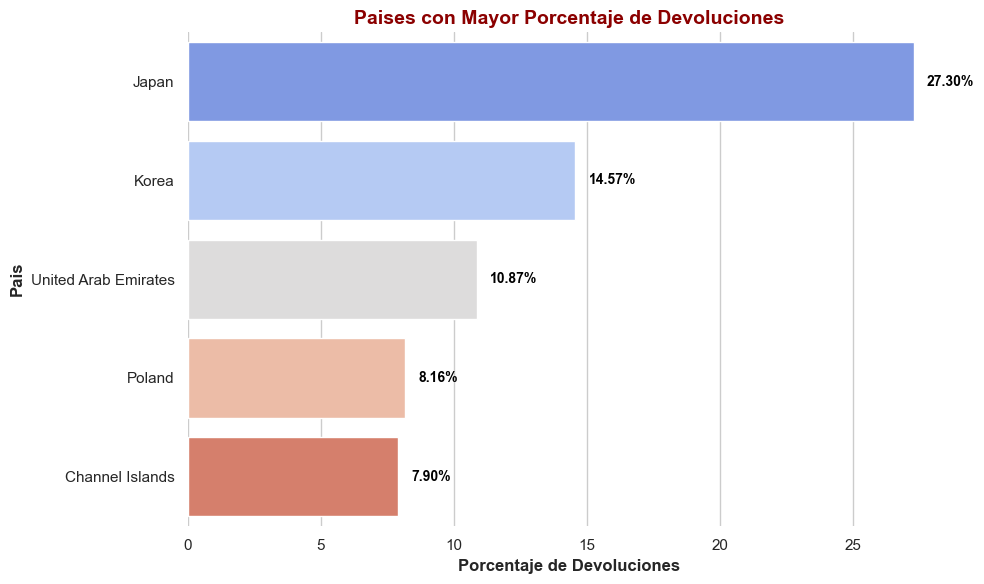

In [32]:
plt.figure(figsize=(10,6))
colores_porcentaje_devo = sns.color_palette("coolwarm", len(paises_mayor_porcentaje_devoluciones))

sns.barplot(
    x="Porcentaje",
    y="Country",
    data = paises_mayor_porcentaje_devoluciones,
    palette=colores_porcentaje_devo
)

for index, value in enumerate(paises_mayor_porcentaje_devoluciones["Porcentaje"]):
    plt.text(value + 0.5, index, f"{value:.2f}%",
             ha='left', va='center', fontsize=10, fontweight='bold', color='black')
    
plt.title("Paises con Mayor Porcentaje de Devoluciones", fontsize = 14, fontweight = "bold", color= "darkred")
plt.xlabel("Porcentaje de Devoluciones", fontsize = 12, fontweight = "bold")
plt.ylabel("Pais", fontsize = 12, fontweight = "bold")

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("img/paisesconmayorporcentajededevoluciones.png", dpi=300)
plt.show()
